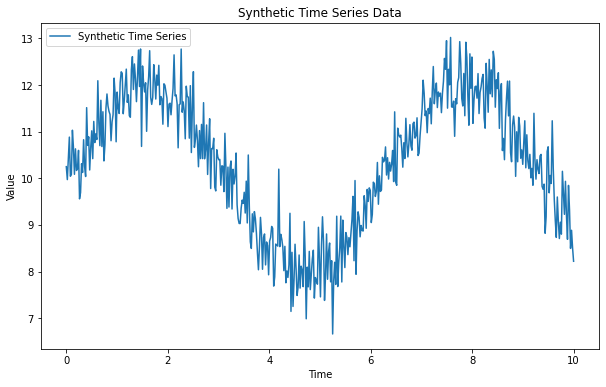

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
time = np.linspace(0, 10, 500)
values = 10 + 2 * np.sin(time) + 0.5 * np.random.normal(size=len(time))
# Create a DataFrame
df = pd.DataFrame({"time": time, "value": values})
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["value"], label="Synthetic Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Synthetic Time Series Data")
plt.legend()
plt.show()

In [2]:
import torch
import torch.nn as nn

# Kolmogorov-Arnold Network
class KolmogorovArnoldNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(KolmogorovArnoldNetwork, self).__init__()
        # Decomposition layer: h_ij
        self.decomposition = nn.Linear(input_dim, hidden_dim)
        # Aggregation layer: g_i
        self.aggregation = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Apply decomposition layer
        h = torch.tanh(self.decomposition(x))
        # Aggregate results
        g = self.aggregation(h)
        return g

Epoch [10/100], Loss: 0.0537
Epoch [20/100], Loss: 0.0672
Epoch [30/100], Loss: 0.0513
Epoch [40/100], Loss: 0.0513
Epoch [50/100], Loss: 0.0506
Epoch [60/100], Loss: 0.0499
Epoch [70/100], Loss: 0.0499
Epoch [80/100], Loss: 0.0498
Epoch [90/100], Loss: 0.0497
Epoch [100/100], Loss: 0.0496


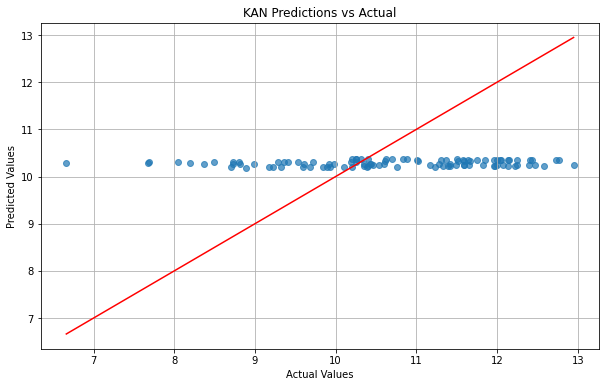

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
time = np.linspace(0, 10, 500)
values = 10 + 2 * np.sin(time) + 0.5 * np.random.normal(size=len(time))
# Create a DataFrame
df = pd.DataFrame({"time": time, "value": values})
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["value"], label="Synthetic Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Synthetic Time Series Data")
plt.legend()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Prepare data
X = np.array(df["time"]).reshape(-1, 1)
y = np.array(df["value"]).reshape(-1, 1)

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


# Model parameters
input_dim = 1
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
num_epochs = 100

# Initialize model, loss function, and optimizer
model = KolmogorovArnoldNetwork(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


# Evaluate on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = scaler_y.inverse_transform(predictions.numpy())
    y_test_actual = scaler_y.inverse_transform(y_test_tensor.numpy())

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, predictions, alpha=0.7)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KAN Predictions vs Actual")
plt.grid()
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
time = np.linspace(0, 10, 500)
values = 10 + 2 * np.sin(time) + 0.5 * np.random.normal(size=len(time))
# Create a DataFrame
df = pd.DataFrame({"time": time, "value": values})
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["value"], label="Synthetic Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Synthetic Time Series Data")
plt.legend()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Prepare data
X = np.array(df["time"]).reshape(-1, 1)
y = np.array(df["value"]).reshape(-1, 1)

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


# Model parameters
input_dim = 1
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
num_epochs = 100

# Initialize model, loss function, and optimizer
model = KolmogorovArnoldNetwork(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


# Evaluate on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = scaler_y.inverse_transform(predictions.numpy())
    y_test_actual = scaler_y.inverse_transform(y_test_tensor.numpy())

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, predictions, alpha=0.7)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KAN Predictions vs Actual")
plt.grid()
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kan import KAN
from sklearn.metrics import accuracy_score

# Load your data

# Split into features and target
X = df.drop("value", axis=1)
y = df["value"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KAN model
model = KAN(width=[X_train.shape[1], 10, 1], grid=5, k=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                          | 0/100 [00:00<?, ?it/s]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

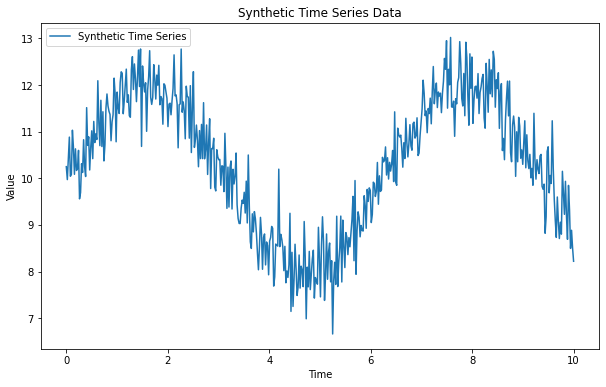

Epoch [10/100], Loss: 0.2293
Epoch [20/100], Loss: 0.0568
Epoch [30/100], Loss: 0.0698
Epoch [40/100], Loss: 0.0581
Epoch [50/100], Loss: 0.0530
Epoch [60/100], Loss: 0.0533
Epoch [70/100], Loss: 0.0519
Epoch [80/100], Loss: 0.0517
Epoch [90/100], Loss: 0.0513
Epoch [100/100], Loss: 0.0510


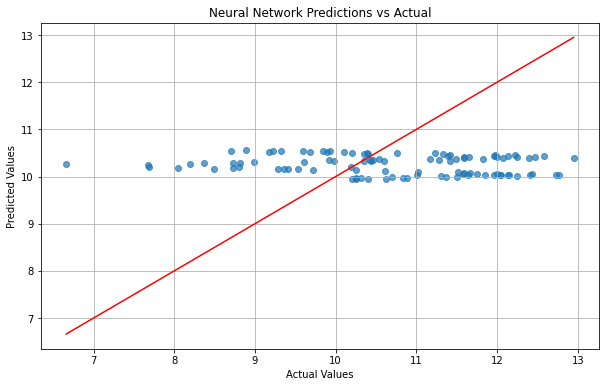

Mean Squared Error: 2.0625


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic time series data
np.random.seed(42)
time = np.linspace(0, 10, 500)
values = 10 + 2 * np.sin(time) + 0.5 * np.random.normal(size=len(time))
df = pd.DataFrame({"time": time, "value": values})

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["value"], label="Synthetic Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Synthetic Time Series Data")
plt.legend()
plt.show()

# Prepare data
X = np.array(df["time"]).reshape(-1, 1)
y = np.array(df["value"]).reshape(-1, 1)

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.layer2(x)
        return x

# Model parameters
input_dim = 1
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
num_epochs = 100

# Initialize model, loss function, and optimizer
model = SimpleNN(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = scaler_y.inverse_transform(predictions.numpy())
    y_test_actual = scaler_y.inverse_transform(y_test_tensor.numpy())

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, predictions, alpha=0.7)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Neural Network Predictions vs Actual")
plt.grid()
plt.show()

# Calculate Mean Squared Error
mse = np.mean((predictions - y_test_actual)**2)
print(f"Mean Squared Error: {mse:.4f}")


Data fetched successfully.
Epoch [10/100], Loss: 0.6336
Epoch [20/100], Loss: 0.2400
Epoch [30/100], Loss: 0.1363
Epoch [40/100], Loss: 0.1270
Epoch [50/100], Loss: 0.0972
Epoch [60/100], Loss: 0.0858
Epoch [70/100], Loss: 0.0757
Epoch [80/100], Loss: 0.0684
Epoch [90/100], Loss: 0.0631
Epoch [100/100], Loss: 0.0589


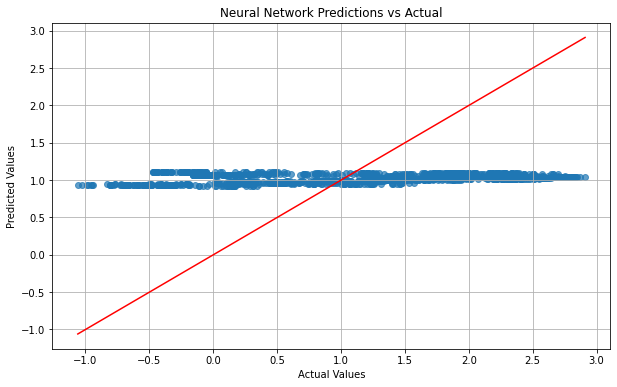

Mean Squared Error: 0.9301


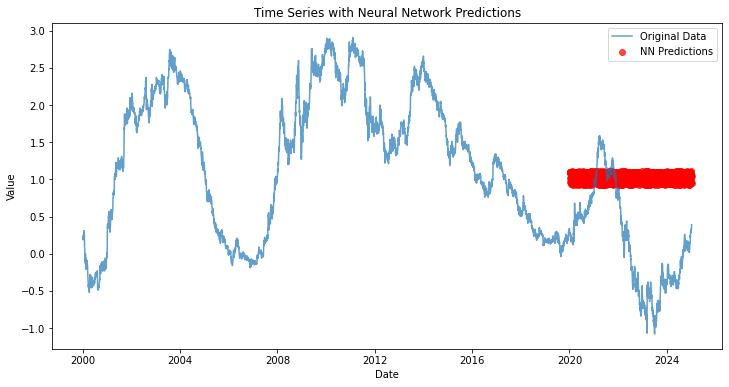

Forecasting completed and visualizations saved.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import requests
from datetime import datetime

def fetch_fred_data(series_id, api_key, start_date='2000-01-01', save_csv=False):
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': datetime.now().strftime('%Y-%m-%d'),
    }
    url = "https://api.stlouisfed.org/fred/series/observations"
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        observations = data['observations']
        df = pd.DataFrame(observations)
        df['date'] = pd.to_datetime(df['date'])
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        
        # Drop rows with NaN values
        df = df.dropna()
        
        df = df.sort_values('date')
        df = df.set_index('date')
        
        if save_csv:
            csv_filename = f"{series_id}_data.csv"
            df.to_csv(csv_filename)
            print(f"Data saved to {csv_filename}")
        
        return df
    else:
        raise Exception(f"API request failed with status code {response.status_code}")

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.layer2(x)
        return x

# Main execution
if __name__ == "__main__":
    api_key = YOUR_KEY
    series_id = "T10Y2Y"

    # Fetch data from FRED
    df = fetch_fred_data(series_id, api_key)
    print("Data fetched successfully.")

    # Prepare data
    df['time'] = (df.index - df.index[0]).days
    X = df['time'].values.reshape(-1, 1)
    y = df['value'].values.reshape(-1, 1)

    # Normalize data
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    # Model parameters
    input_dim = 1
    hidden_dim = 10
    output_dim = 1
    learning_rate = 0.01
    num_epochs = 100

    # Initialize model, loss function, and optimizer
    model = SimpleNN(input_dim, hidden_dim, output_dim)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predictions = scaler_y.inverse_transform(predictions.numpy())
        y_test_actual = scaler_y.inverse_transform(y_test_tensor.numpy())

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_actual, predictions, alpha=0.7)
    plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color="red")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Neural Network Predictions vs Actual")
    plt.grid()
    plt.savefig("NN_Predictions_vs_Actual.png")
    plt.show()

    # Calculate Mean Squared Error
    mse = np.mean((predictions - y_test_actual)**2)
    print(f"Mean Squared Error: {mse:.4f}")

    # Plot the original time series with predictions
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, scaler_y.inverse_transform(y), label='Original Data', alpha=0.7)
    plt.scatter(df.index[int(0.8*len(df)):], predictions, color='red', label='NN Predictions', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Time Series with Neural Network Predictions')
    plt.legend()
    plt.savefig("NN_Time_Series_Predictions.png")
    plt.show()

    print("Forecasting completed and visualizations saved.")
